In [5]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
data= pd.read_excel("C:/Users/mkhapre/Desktop/Scrap/Revenue Data.xlsx")

In [7]:
data.head()

,Month,Revenue
0,1956-01,93.2
1,1956-02,96.0
2,1956-03,95.2
3,1956-04,77.1
4,1956-05,70.9


In [8]:
data.shape

(476, 2)

In [9]:
data.Month = pd.to_datetime(data.Month)


In [10]:

data = data.set_index("Month")
data.head()

,Revenue
Month,
1956-01-01,93.2
1956-02-01,96.0
1956-03-01,95.2
1956-04-01,77.1
1956-05-01,70.9


<Axes: title={'center': 'Monthly Beer Production'}, xlabel='Month'>

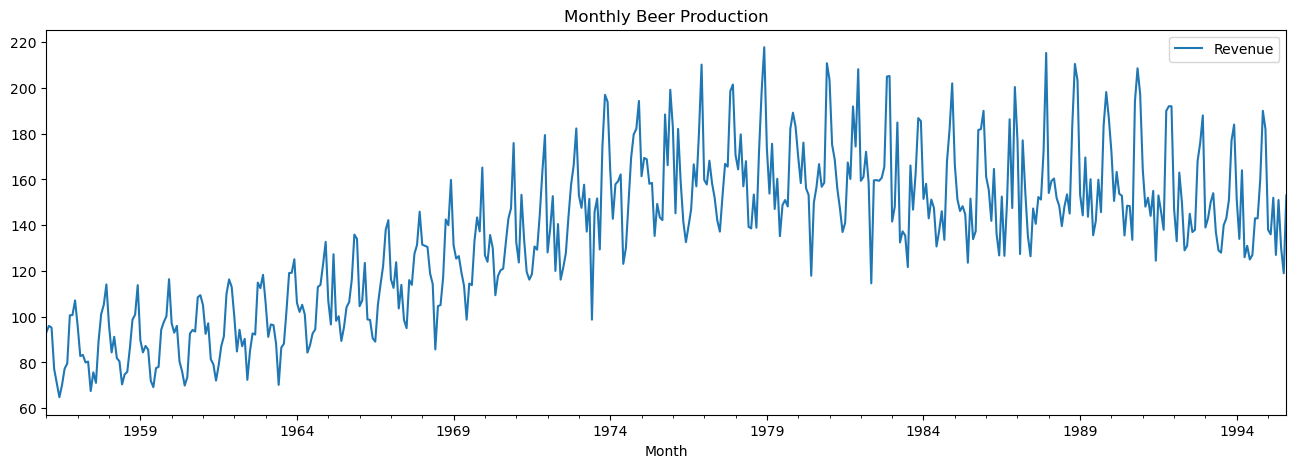

In [11]:
%matplotlib inline
data.plot(figsize = (16,5), title = 'Monthly Beer Production')

<Figure size 1200x800 with 0 Axes>

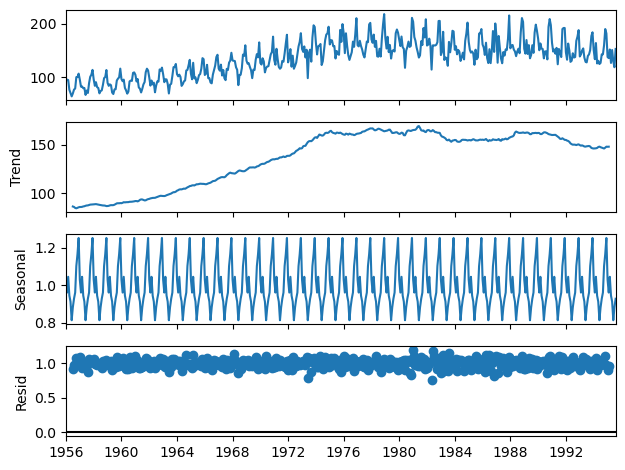

In [12]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt  
plt.figure(figsize=(12, 8))  
result = seasonal_decompose(data, model='multiplicative')
fig = result.plot()

In [13]:
from pmdarima.arima import auto_arima
stepwise_model = auto_arima(data, start_p=1, start_q=1,
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print(stepwise_model.aic())
     

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=3473.445, Time=0.81 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=4010.558, Time=0.13 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=3816.510, Time=0.26 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=3483.597, Time=0.42 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=3639.093, Time=0.28 sec
 ARIMA(1,1,1)(1,1,1)[12]             : AIC=3468.290, Time=1.24 sec
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=3579.709, Time=0.72 sec
 ARIMA(1,1,1)(2,1,1)[12]             : AIC=3467.032, Time=2.35 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=3552.157, Time=0.90 sec
 ARIMA(1,1,1)(2,1,2)[12]             : AIC=3461.258, Time=3.77 sec
 ARIMA(1,1,1)(1,1,2)[12]             : AIC=3469.175, Time=2.16 sec
 ARIMA(0,1,1)(2,1,2)[12]             : AIC=3468.958, Time=2.63 sec
 ARIMA(1,1,0)(2,1,2)[12]             : AIC=3661.309, Time=4.15 sec
 ARIMA(2,1,1)(2,1,2)[12]             : AIC=3446.515, Time=4.61 sec
 ARIMA(2,1,1)(1,1,2

In [14]:
train_data = data[:len(data)-12]
test_data = data[len(data)-12:]
     

In [15]:
train_data[0:10]

,Revenue
Month,
1956-01-01,93.2
1956-02-01,96.0
1956-03-01,95.2
1956-04-01,77.1
1956-05-01,70.9
1956-06-01,64.8
1956-07-01,70.1
1956-08-01,77.3
1956-09-01,79.5


In [16]:
test_data.shape

(12, 1)

In [17]:
test_data[0:10]

,Revenue
Month,
1994-09-01,143.0
1994-10-01,160.0
1994-11-01,190.0
1994-12-01,182.0
1995-01-01,138.0
1995-02-01,136.0
1995-03-01,152.0
1995-04-01,127.0
1995-05-01,151.0


In [18]:
stepwise_model.fit(train_data)


ARIMA(order=(2, 1, 3), scoring_args={}, seasonal_order=(0, 1, 1, 12),
      suppress_warnings=True, with_intercept=False)

In [20]:
future_forecast = stepwise_model.predict(n_periods=12)
# This returns an array of predictions:>>>
print(future_forecast)
     

1994-09-01    134.678864
1994-10-01    157.932210
1994-11-01    181.401192
1994-12-01    183.578491
1995-01-01    141.269639
1995-02-01    140.594066
1995-03-01    148.896059
1995-04-01    133.305081
1995-05-01    138.002581
1995-06-01    117.023864
1995-07-01    128.692137
1995-08-01    141.253310
Freq: MS, dtype: float64


<Axes: xlabel='Month'>

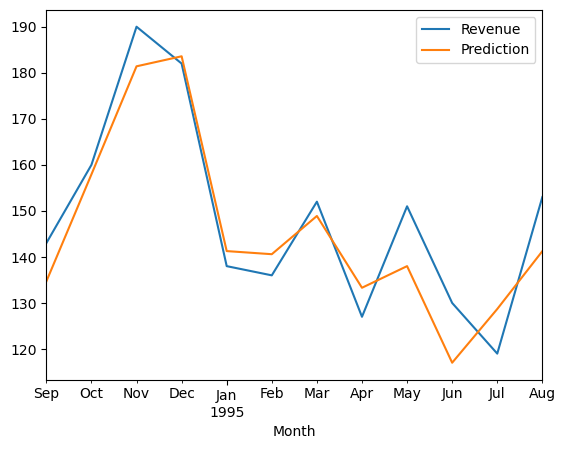

In [21]:
future_forecast = pd.DataFrame(future_forecast, index = test_data.index, columns=['Prediction'])
pd.concat([test_data,future_forecast],axis=1).plot()
     
    

<Axes: xlabel='Month'>

<Figure size 1500x1000 with 0 Axes>

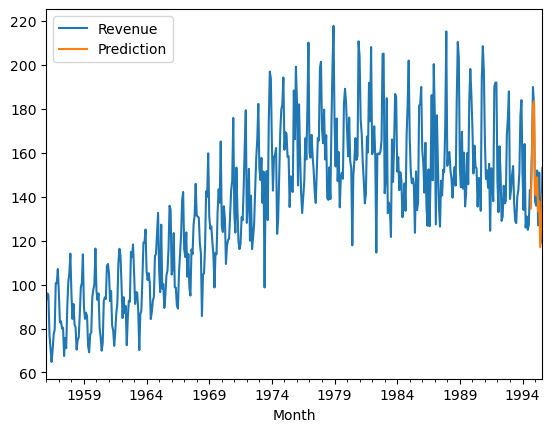

In [22]:
plt.figure(figsize=(15, 10))  
pd.concat([data,future_forecast],axis=1).plot()

In [24]:
#Another approach by setting the values of p d q to max.
auto_arima(data['Revenue'], seasonal=True, m=12,max_p=7, max_d=5,max_q=7, max_P=4, max_D=4,max_Q=4).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                         SARIMAX Results                                          
==================================================================================================
Dep. Variable:                                          y   No. Observations:                  476
Model:             SARIMAX(0, 1, 4)x(4, 0, [1, 2, 3], 12)   Log Likelihood               -1743.985
Date:                                    Mon, 16 Oct 2023   AIC                           3513.969
Time:                                            10:50:41   BIC                           3568.092
Sample:                                        01-01-1956   HQIC                          3535.253
                                             - 08-01-1995                                         
Covariance Type:                                      opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0003      0.006      0.045      0.964      -0.012       0.012
ma.L1         -0.9897      0.041    -24.344      0.000      -1.069      -0.910
ma.L2         -0.0712      0.057     -1.259      0.208      -0.182       0.040
ma.L3          0.1395      0.058      2.395      0.017       0.025       0.254
ma.L4          0.0554      0.041      1.363      0.173      -0.024       0.135
ar.S.L12       1.6989      0.116     14.635      0.000       1.471       1.926
ar.S.L24      -1.4923      0.224     -6.672      0.000      -1.931      -1.054
ar.S.L36       0.6572      0.182      3.602      0.000       0.300       1.015
ar.S.L48       0.1305      0.072      1.823      0.068      -0.010       0.271
ma.S.L12      -1.4881      0.126    -11.769      0.000      -1.736      -1.240
ma.S.L24       1.2992      0.204      6.379      0.000       0.900       1.698
ma.S.L36      -0.5615      0.122     -4.606      0.000      -0.800      -0.323
sigma2        82.6841      4.747     17.418      0.000      73.380      91.988
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                42.10
Prob(Q):                              0.93   Prob(JB):                         0.00
Heteroskedasticity (H):               3.14   Skew:                            -0.30
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.33
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [25]:
import statsmodels.api as sm
sm.tsa.statespace.SARIMAX

statsmodels.tsa.statespace.sarimax.SARIMAX

In [27]:
arima_model = sm.tsa.SARIMAX(train_data['Revenue'], order = (3,1,4), seasonal_order = (2,0,2,12))
arima_result = arima_model.fit()
arima_result.summary()

C:\ProgramFilesFolder\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramFilesFolder\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramFilesFolder\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\ProgramFilesFolder\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                                 Revenue   No. Observations:                  464
Model:             SARIMAX(3, 1, 4)x(2, 0, [1, 2], 12)   Log Likelihood               -1687.474
Date:                                 Mon, 16 Oct 2023   AIC                           3398.948
Time:                                         12:11:23   BIC                           3448.601
Sample:                                     01-01-1956   HQIC                          3418.495
                                          - 08-01-1994                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3440      0.063     -5.490      0.000      -0.467      -0.221
ar.L2         -0.0681      0.073     -0.934      0.350      -0.211       0.075
ar.L3          0.7892      0.064     12.324      0.000       0.664       0.915
ma.L1         -0.7130      0.049    -14.594      0.000      -0.809      -0.617
ma.L2         -0.1733      0.031     -5.521      0.000      -0.235      -0.112
ma.L3         -0.8068      0.028    -28.993      0.000      -0.861      -0.752
ma.L4          0.8056      0.044     18.315      0.000       0.719       0.892
ar.S.L12       0.0808      0.086      0.943      0.345      -0.087       0.249
ar.S.L24       0.9142      0.084     10.826      0.000       0.749       1.080
ma.S.L12       0.1296      0.095      1.370      0.171      -0.056       0.315
ma.S.L24      -0.7881      0.058    -13.552      0.000      -0.902      -0.674
sigma2        77.0757      3.847     20.037      0.000      69.536      84.615
===================================================================================
Ljung-Box (L1) (Q):                   1.60   Jarque-Bera (JB):                76.81
Prob(Q):                              0.21   Prob(JB):                         0.00
Heteroskedasticity (H):               3.81   Skew:                            -0.26
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.93
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [28]:
arima_pred = arima_result.predict(start = len(train_data), end = len(data)-1, typ="levels").rename("ARIMA Predictions")
arima_pred

C:\ProgramFilesFolder\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


1994-09-01    133.165954
1994-10-01    158.087752
1994-11-01    178.655244
1994-12-01    180.017883
1995-01-01    141.296115
1995-02-01    139.140055
1995-03-01    147.865404
1995-04-01    134.526993
1995-05-01    134.014934
1995-06-01    118.108631
1995-07-01    129.191544
1995-08-01    137.762222
Freq: MS, Name: ARIMA Predictions, dtype: float64

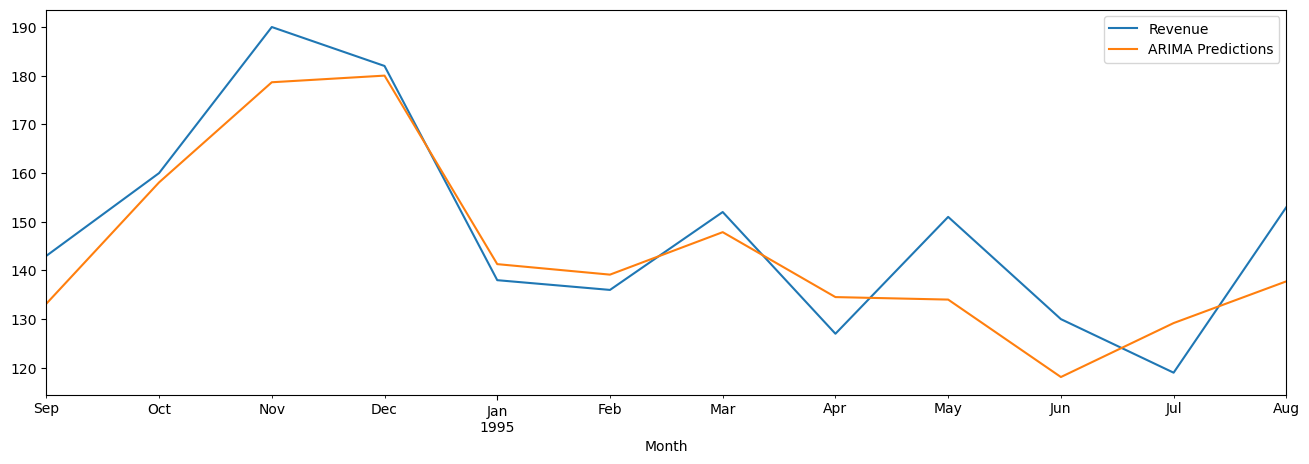

In [30]:

test_data['Revenue'].plot(figsize = (16,5), legend=True)
arima_pred.plot(legend = True);

In [31]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())
     

In [33]:
arima_rmse_error = rmse(test_data['Revenue'], arima_pred)
arima_mse_error = arima_rmse_error**2
mean_value = data['Revenue'].mean()

print(f'MSE Error: {arima_mse_error}\nRMSE Error: {arima_rmse_error}\nMean: {mean_value}')

MSE Error: 91.11890168924849
RMSE Error: 9.545622121645529
Mean: 136.3953781512605


In [34]:
test_data['ARIMA_Predictions'] = arima_pred

C:\Users\mkhapre\AppData\Local\Temp\ipykernel_11128\3839166069.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['ARIMA_Predictions'] = arima_pred


In [35]:
test_data.head()

,Revenue,ARIMA_Predictions
Month,,
1994-09-01,143.0,133.165954
1994-10-01,160.0,158.087752
1994-11-01,190.0,178.655244
1994-12-01,182.0,180.017883
1995-01-01,138.0,141.296115


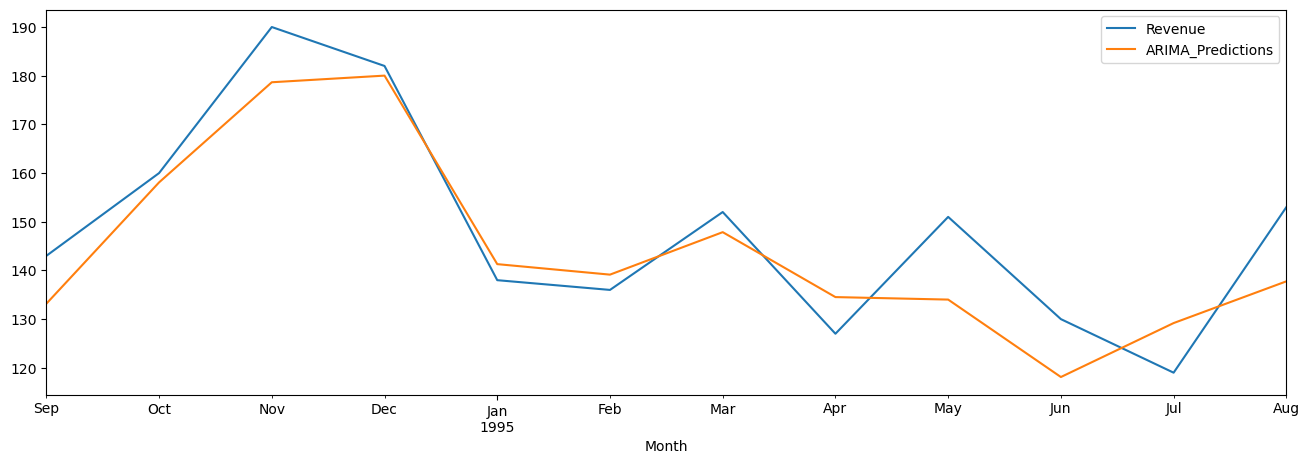

In [39]:
test_data['Revenue'].plot(figsize = (16,5), legend=True)
test_data['ARIMA_Predictions'].plot(legend = True);